# Bloom Filters

This notebook introduces the `bloom_filter` Python library and compares its performance with other Python data structures.

Reference: [Stanford CS 246](https://web.stanford.edu/class/cs246/)

In [1]:
# install bloom_filter library
!pip install bloom_filter

# Import a large list of English dictionary works
import nltk
nltk.download('words')

from nltk.corpus import words
word_list = words.words()
print(f'Dictionary length: {len(word_list)}')
print(word_list[:15])

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


Dictionary length: 236736
['A', 'a', 'aa', 'aal', 'aalii', 'aam', 'Aani', 'aardvark', 'aardwolf', 'Aaron', 'Aaronic', 'Aaronical', 'Aaronite', 'Aaronitic', 'Aaru']


In [2]:
# Load a group of movie reviews
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')

neg_reviews = []
pos_reviews = []

for fileid in movie_reviews.fileids('neg'):
  neg_reviews.extend(movie_reviews.words(fileid))
for fileid in movie_reviews.fileids('pos'):
  pos_reviews.extend(movie_reviews.words(fileid))

len(word_list)

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


236736

In [3]:
# Create a bloom filter
from bloom_filter import BloomFilter

word_filter = BloomFilter(max_elements=236736)

for word in word_list:
  word_filter.add(word)

# For comparison, also create a set of words
word_set = set(word_list)

# Inspect the size of each data structure using getsizeof() method
from sys import getsizeof

print(f'Size of word_list (in bytes): {getsizeof(word_list)}')

print(f'Size of word_filter (in bytes): {getsizeof(word_filter)}')

print(f'Size of word_set (in bytes): {getsizeof(word_set)}')

# Use %timeit magic command to estimate execution time
%timeit "California" in word_list
%timeit "California" in word_filter
%timeit "California" in word_set

Size of word_list (in bytes): 2055512
Size of word_filter (in bytes): 48
Size of word_set (in bytes): 8388824
1.93 ms ± 542 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
24.3 µs ± 5.53 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
76.7 ns ± 21.1 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


### Setup

In this Colab we just need to install a [bloom_filter](https://github.com/hiway/python-bloom-filter), a Python library which offers an implementations of Bloom filters.  Run the cell below!

In [4]:
!pip install bloom_filter

### Data Loading

From the NLTK (Natural Language ToolKit) library, we import a large list of English dictionary words, commonly used by the very first spell-checking programs in Unix-like operating systems.

In [5]:
import nltk
nltk.download('words')

from nltk.corpus import words
word_list = words.words()
print(f'Dictionary length: {len(word_list)}')
print(word_list[:15])

Dictionary length: 236736
['A', 'a', 'aa', 'aal', 'aalii', 'aam', 'Aani', 'aardvark', 'aardwolf', 'Aaron', 'Aaronic', 'Aaronical', 'Aaronite', 'Aaronitic', 'Aaru']


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


Then we load another dataset from the NLTK Corpora collection: ```movie_reviews```.

The movie reviews are categorized between *positive* and *negative*, so we construct a list of words (usually called **bag of words**) for each category.

In [6]:
from nltk.corpus import movie_reviews
nltk.download('movie_reviews')

neg_reviews = []
pos_reviews = []

for fileid in movie_reviews.fileids('neg'):
  neg_reviews.extend(movie_reviews.words(fileid))
for fileid in movie_reviews.fileids('pos'):
  pos_reviews.extend(movie_reviews.words(fileid))

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In this Colab, we will develop a very simplistic spell-checker.  By no means we should think of using it for a real-world use case, but it is an interesting exercise to highlight the strenghts and weaknesses of Bloom Filters!

In [7]:
from bloom_filter import BloomFilter

word_filter = BloomFilter(max_elements=236736)

for word in word_list:
  word_filter.add(word)

word_set = set(word_list)

If we executed the cell above, we now have 3 different variables in our scope:

1.   ```word_list```, a Python list containing the English dictionary (in case insensitive order)
2.   ```word_filter```, a Bloom filter where we have already added all the words in the English dictionary
3.   ```word_set```, a [Python set](https://docs.python.org/3.6/library/stdtypes.html#set-types-set-frozenset) built from the same list of words in the English dictionary

Let's inspect the size of each data structure using the [getsizeof()](https://docs.python.org/3/library/sys.html#sys.getsizeof) method!



In [8]:
from sys import getsizeof

print(f'Size of word_list (in bytes): {getsizeof(word_list)}')

print(f'Size of word_filter (in bytes): {getsizeof(word_filter)}')
print(f'Size of word_set (in bytes): {getsizeof(word_set)}')

Size of word_list (in bytes): 2055512
Size of word_filter (in bytes): 48
Size of word_set (in bytes): 8388824


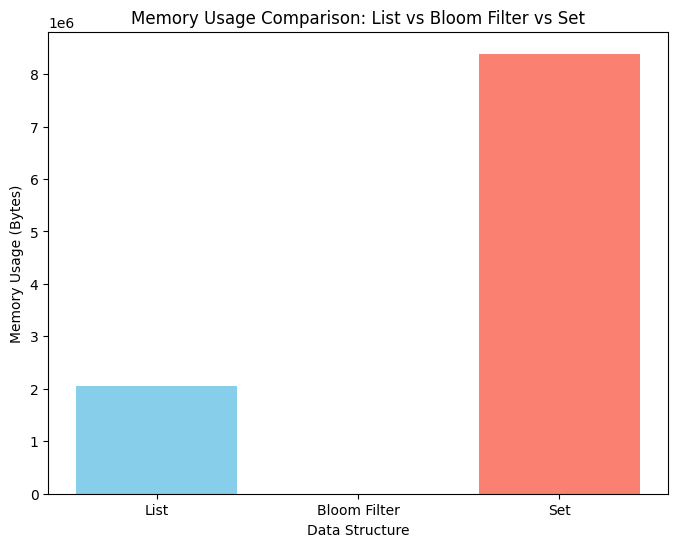

In [11]:
import matplotlib.pyplot as plt

# Memory usage data
memory_usage = [getsizeof(word_list), getsizeof(word_filter), getsizeof(word_set)]
labels = ['List', 'Bloom Filter', 'Set']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(labels, memory_usage, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel('Data Structure')
plt.ylabel('Memory Usage (Bytes)')
plt.title('Memory Usage Comparison: List vs Bloom Filter vs Set')
plt.show()


The bar chart you shared is effective in visualizing the memory usage comparison between different data structures. It clearly shows the stark difference in memory consumption:

List uses about 2 MB of memory.
Set uses significantly more memory, around 8 MB.
Bloom Filter, on the other hand, is practically negligible in memory usage (the bar is barely visible).

We should have noticed how efficient is the Bloom filter in terms of memory footprint!

Now let's find out how fast is the main operation for which we construct Bloom filters: *membership testing*. To do so, we will use the ```%timeit``` IPython magic command, which times the repeated execution of a single Python statement.

In [9]:
%timeit -r 3 "California" in word_list
%timeit "California" in word_filter
%timeit "California" in word_set

1.76 ms ± 438 µs per loop (mean ± std. dev. of 3 runs, 1000 loops each)
34.3 µs ± 13.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
55.3 ns ± 0.815 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


Notice the performance gap between linear search on a list, multiple hash computations in a Bloom filter, and a single hash computation in a native Python ```Set()```.

We now have all the building blocks required to build our spell-checker, and we understand the performance tradeoffs of each data structure we chose. Write a function that takes as arguments (1) a list of words, and (2) any of the 3 dictionary data structures we constructed. The function must return the number of words which **do not appear** in the dictionary.

In [10]:
def func(a, ds):
  cnt = 0
  for x in a:
    if x not in ds:
      cnt += 1
      return cnt / len(a)

%timeit func(neg_reviews, word_filter)

# Example usage with %timeit
result_ratio = func(neg_reviews, word_filter)
print(f'Ratio of words not in the dictionary: {result_ratio}')

14.3 µs ± 3.78 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Ratio of words not in the dictionary: 1.3311041775373508e-06


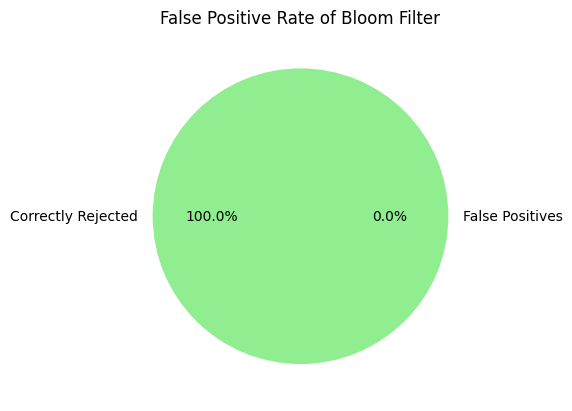

In [12]:
import random

# Generate random words not in the dictionary
non_existing_words = ['xyzabc', 'notaword', 'testword', 'invalidword', 'randomstring']

# Test false positives
false_positives = sum(1 for word in non_existing_words if word in word_filter)

# Visualize the false positive rate
plt.pie([len(non_existing_words) - false_positives, false_positives],
        labels=['Correctly Rejected', 'False Positives'],
        autopct='%1.1f%%',
        colors=['lightgreen', 'salmon'])
plt.title('False Positive Rate of Bloom Filter')
plt.show()
